In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

In [95]:
class Network(object):
    def __init__(self, n, init='standard'):
        # Initialize the weights randomly
        if init == 'normalized':
            self.W = self.W = np.random.randn(n, 784)/28
            self.b = np.random.randn(n)
            self.V = np.random.randn(10, n)/np.sqrt(n)
            self.bprime = np.random.randn(10)
        elif init == 'standard':
            self.W = np.random.randn(n, 784)
            self.b = np.random.randn(n)
            self.V = np.random.randn(10, n)
            self.bprime = np.random.randn(10)
        else:
            raise Exception('Invalid Initialization')
    def feedforward(self, x):
        # Return the output of a feedforward pass
        a = sigmoid(np.dot(self.W, x)+self.b)
        return sigmoid(np.dot(self.V, a)+self.bprime)
    
    def evaluate(self, data):
        """ Return (cost, accuracy) on the data"""
        correct_samples = 0
        total_cost = 0
        n_samples = len(data)
        
        for x, ylabel in data:
            y = self.feedforward(x)
            prediction = np.argmax(y)
            if prediction == ylabel:
                correct_samples += 1
            
            y[ylabel] -= 1.0
            total_cost += np.dot(y, y)
        
        return total_cost / n_samples, correct_samples / n_samples
            
    
    def update_mini_batch(self, mini_batch, eta):
        # Run backprop and update weights on the minibatch
        k = len(mini_batch)
        delta_W = np.zeros(self.W.shape)
        delta_b = np.zeros(self.b.shape)
        delta_V = np.zeros(self.V.shape)
        delta_bprime = np.zeros(self.bprime.shape)
        
        for x, y in mini_batch:
            nabla_W, nabla_b, nabla_V, \
                nabla_bprime = self.backprop(x, y)
            delta_W += nabla_W
            delta_b += nabla_b
            delta_V += nabla_V
            delta_bprime += nabla_bprime
        
        self.W -= eta/k * delta_W
        self.b -= eta/k * delta_b
        self.V -= eta/k * delta_V
        self.bprime -= eta/k * delta_bprime

    def SGD(self, training_data, epochs, mini_batch_size, 
            eta, test_data=[]):
        # Run SGD with those parameters
        # Return a list of results for every epoch
        # For each epoch, append pair (self.evaluate(training_data), 
        #        self.evaluate(test_data))
        res = []

        for i in range(epochs):
            np.random.shuffle(training_data)
            for j in range(0, len(training_data), mini_batch_size):
                mini_batch = training_data[j:j+mini_batch_size]
                self.update_mini_batch(mini_batch, eta)

            if test_data == []:
                res.append(self.evaluate(training_data))
            else:                
                res.append((self.evaluate(training_data),
                       self.evaluate(test_data)))
            
            print('Epoch '+str(i)+' finished')
        
        return res
        
    def backprop(self, x, y):
        # feedforward
        z1 = np.dot(self.W, x)+self.b
        a1 = sigmoid(z1)
        z2 = np.dot(self.V, a1)+self.bprime
        a2 = sigmoid(z2)
        
        # backward
        delta_2 = self.cost_derivative(a2, y) * sigmoid_prime(z2)
        nabla_bprime = delta_2
        nabla_V = np.outer(delta_2, a1)
        
        delta_1 = np.dot(self.V.transpose(), delta_2) * sigmoid_prime(z1)
        nabla_b = delta_1
        nabla_W = np.outer(delta_1, x)
        
        return nabla_W, nabla_b, nabla_V, nabla_bprime
            
    def cost_derivative(self, output_activations, ylabel):
        """Return the vector of partial derivatives \\partial C_x /
        \\partial a for the output activations."""
        return (output_activations-Network.vec_output[ylabel])
    
    vec_output = []
    for ylabel in range(10):
        V = np.zeros(10)
        V[ylabel] = 1
        vec_output.append(V)  

In [50]:
def sigmoid(z):
    return 1 / (1.0+np.exp(-z))
def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

# Exercise 1: Augmenting the dataset

In [51]:
def load_data():
    # Note you have to update the path below
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return training_data, validation_data, test_data
def zip_data(D):
    return list(zip(D[0], D[1]))

In [52]:
TRAIN, VALIDATION, TEST = load_data()

In [53]:
train_data = zip_data(TRAIN)
validation_data = zip_data(VALIDATION)
test_data = zip_data(TEST)

In [54]:
def plot_digit(x):
    IM = np.reshape(x, (28, 28))
    plt.imshow(1-IM, cmap='gray', vmin=0, vmax=1)

In [4]:
plot_digit(train_data[1][0])


NameError: name 'train_data' is not defined

In [9]:
train_data[10][0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [37]:
IMG_LENGTH = 28
def shift_image(x, shift_row, shift_column):
    # Returns image `x` shifted
    # by `shift_row` pixels vertically and
    # `shift_column pixels horizontally
    x = np.array(x)
    x = x.reshape((6, 6))
    x = np.roll(x,shift_column, axis=0)
    x= np.roll(x,shift_row, axis=1)
    return x.flatten()

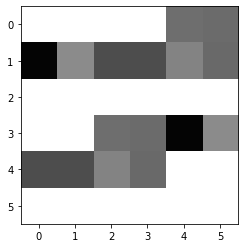

In [39]:
X=[0,0,0,0,0.567,0.5800,0.98400,0.456984,0.696966,0.696969696,0.487485,0.5858358,0,0,0,0,0,0,0,0,0.567,0.5800,0.98400,0.456984,0.696966,0.696969696,0.487485,0.5858358,0,0,0,0,0,0,0,0]
def plot_dig(x):
    IM = np.reshape(x, (6, 6))
    plt.imshow(1-IM, cmap='gray', vmin=0, vmax=1)
plot_dig(X)

In [44]:
new_x = shift_image(X, -3,2)
print(new_x)

[0.5858358 0.        0.        0.696966  0.6969697 0.487485  0.
 0.        0.        0.        0.        0.        0.        0.567
 0.58      0.        0.        0.        0.6969697 0.487485  0.5858358
 0.984     0.456984  0.696966  0.        0.        0.        0.
 0.        0.        0.58      0.984     0.456984  0.        0.
 0.567    ]


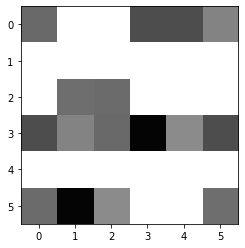

In [45]:
plot_dig(new_x)

In [38]:
def shift_dataset(L):
    # Returns a new dataset where for every picture:
    # 1) Original is kept
    # 2) There are four new versions shifted by 1 pixel left, right, up and down
    n_l=[]
    for i in L:
        t=shift_image(i[0],1,0)
        x=shift_image(i[0],-1,0)
        y=shift_image(i[0],0,1)
        w=shift_image(i[0],0,-1)
        n_l.append((t,i[1]))
        n_l.append((x,i[1]))
        n_l.append((y,i[1]))
        n_l.append((w,i[1]))
        n_l.append((i[0],i[1]))
    return n_l

In [39]:
expanded_train_data = shift_dataset(train_data)

In [40]:
len(expanded_train_data)

250000

In [41]:
net = Network(30)

In [42]:
results = net.SGD(expanded_train_data, 30, 10, 3.0, test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


In [63]:
def plot_results(res):
    X = list(range(len(res)))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    train_acc = [x[0][1] for x in res]
    test_acc = [x[1][1] for x in res]
    ax1.plot(X, train_acc, label='train')
    ax1.plot(X, test_acc, label='test')
    ax1.set_title('Accuracy')
    ax1.legend()
    
    train_cost = [x[0][0] for x in res]
    test_cost = [x[1][0] for x in res]
    ax2.plot(X, train_cost, label='train')
    ax2.plot(X, test_cost, label='test')
    ax2.set_title('Loss')
    ax2.legend()

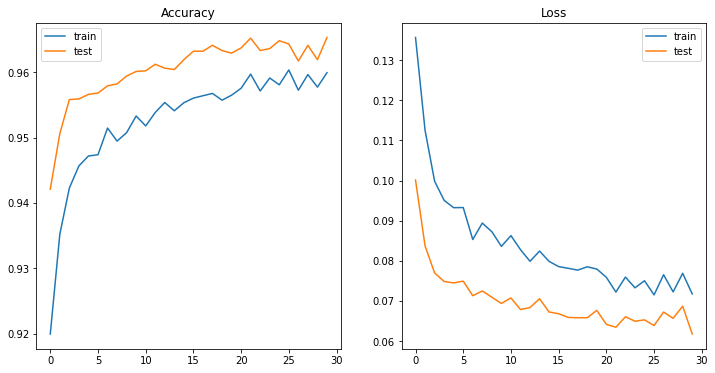

In [45]:
plot_results(results)

In [46]:
np.max([x[1][1] for x in results])

0.9653

# Exercise 2: Cross-entropy

Modify the network so that it is possible to use either square loss or cross-entropy loss. It will be handled by making the loss an object that is given at initialization:

In [ ]:
class QuadraticLoss:
    @staticmethod
    def loss(y, ytilde):
        return 0.5*np.dot(y-ytilde, y-ytilde)
    @staticmethod
    def loss_derivative(y, ytilde):
        return y-ytilde

In [ ]:
class CrossEntropyLoss:
    @staticmethod
    # y is the output of the network, ytilde is the correct output 
    def loss(y, ytilde):
        pass
    def loss_derivative(y, ytilde):
        pass

In [ ]:
NET2 = Network(30, loss=CrossEntropyLoss)
results2 = NET2.SGD(train_data, 
                    epochs=30, 
                    mini_batch_size=10, 
                    eta=0.5, 
                    test_data=test_data)

# Exercise 3

In [99]:
NetN = Network(30,init ='normalized')

In [100]:
res = NetN.SGD(train_data,epochs=30,mini_batch_size=10,eta=3,test_data=test_data)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished
Epoch 3 finished
Epoch 4 finished
Epoch 5 finished
Epoch 6 finished
Epoch 7 finished
Epoch 8 finished
Epoch 9 finished
Epoch 10 finished
Epoch 11 finished
Epoch 12 finished
Epoch 13 finished
Epoch 14 finished
Epoch 15 finished
Epoch 16 finished
Epoch 17 finished
Epoch 18 finished
Epoch 19 finished
Epoch 20 finished
Epoch 21 finished
Epoch 22 finished
Epoch 23 finished
Epoch 24 finished
Epoch 25 finished
Epoch 26 finished
Epoch 27 finished
Epoch 28 finished
Epoch 29 finished


In [102]:
np.max([x[1][1] for x in res])

0.9602